In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/Users/yingyuxuan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [5]:
 df[df['_STATE'].isin([9,34,36])].head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [6]:
# your code here
df['_STATE'].unique()

array([ 9., 34., 36.])

Now check to see how large our subset df.

In [7]:
df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [8]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [9]:
#your code here

zero_dict = {88:0, 
            77: np.nan,
            99: np.nan}

df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)

In [10]:
df.shape

(34545, 358)

In [11]:
df.dropna(subset=['PHYSHLTH'], inplace=True)

In [12]:
df.shape

(33747, 358)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [13]:
# descriptive statistics
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

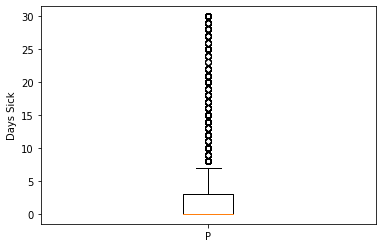

In [14]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot(df['PHYSHLTH'])

# Add x-axis tick labels:
ax.set_xticklabels('PHYSHLTH')

# Add a y-axis label
ax.set_ylabel("Days Sick")

plt.show()


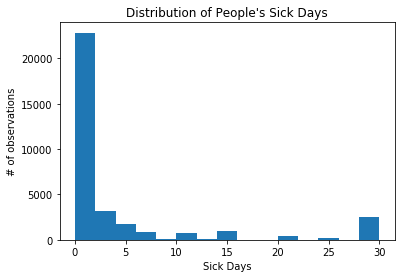

In [15]:
# graphic showing the histogram of data
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df['PHYSHLTH'], bins=15)

ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")

plt.show()

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [16]:
# code to calculate the average number of sick days by state

df.groupby('_STATE')['PHYSHLTH'].mean()

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

In [17]:
means = df.groupby('_STATE')['PHYSHLTH'].mean().values
states = ['Conn', 'NJ', 'NY']

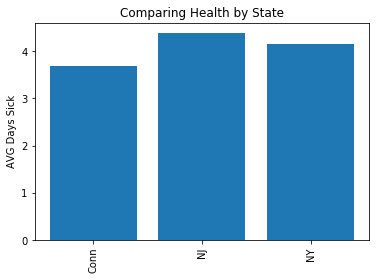

In [18]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(states, means)

# Set title and lables
ax.set_xticklabels(['Conn', 'NJ', 'NY'], rotation=90)
ax.set_ylabel("AVG Days Sick")
ax.set_title('Comparing Health by State')

plt.show()

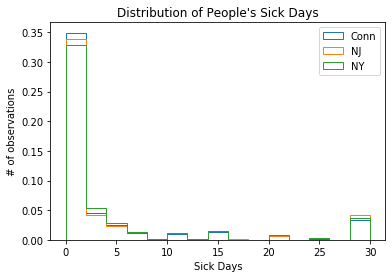

In [19]:
# graphic showing the histogram of data

fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df[df['_STATE']==9]['PHYSHLTH'], bins=15, density=True, histtype='step', label='Conn')
ax.hist(df[df['_STATE']==34]['PHYSHLTH'], bins=15, density=True,histtype='step', label='NJ')
ax.hist(df[df['_STATE']==36]['PHYSHLTH'], bins=15, density=True,histtype='step', label='NY')

# Set labels and title
ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")
ax.legend()

plt.show()

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [20]:
def is_Chronic(df):
    if df['PHYSHLTH'] > 10:
        return 1
    else:
        return 0
df['CHRON_SICK'] = df.apply(is_Chronic, axis=1)

In [21]:
# code to create new colum for chronically sick

df['CHRONIC'] = np.where(df['PHYSHLTH']>=15, 1,0)

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [22]:
df.groupby('_STATE')['CHRONIC'].mean()

_STATE
9.0     0.103428
34.0    0.127335
36.0    0.115948
Name: CHRONIC, dtype: float64

In [23]:
# code to calculate averages per state
chronic_means = df.groupby('_STATE')['CHRONIC'].mean().values
df.groupby('_STATE')['CHRONIC'].mean()

_STATE
9.0     0.103428
34.0    0.127335
36.0    0.115948
Name: CHRONIC, dtype: float64

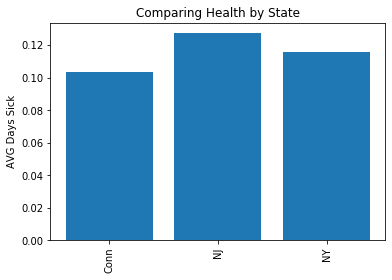

In [24]:
# create graphic to compare chronically sick by state
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(states, chronic_means)

# Set labels and title
ax.set_xticklabels(['Conn', 'NJ', 'NY'], rotation=90)
ax.set_ylabel("AVG Days Sick")
ax.set_title('Comparing Health by State')

plt.show()

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [25]:
df.shape

(33747, 360)

In [26]:
df['SMOKDAY2'].value_counts()

3.0    9494
1.0    2611
2.0    1336
9.0      21
7.0       6
Name: SMOKDAY2, dtype: int64

In [27]:
df['SMOKDAY2'].value_counts().sum()

13468

In [28]:
df['smoking'] = np.where(df['SMOKE100']==2, 3, df['SMOKDAY2'])




In [29]:
df['smoking'].value_counts().sum()

32153

In [30]:
df['smoking'] = np.where(df['SMOKE100']==7, 7, df['smoking'])
df['smoking'] = np.where(df['SMOKE100']==9, 9, df['smoking'])

In [31]:
df['smoking'].count()

32359

In [32]:
df['smoking'].describe()

count    32359.000000
mean         2.830217
std          0.700878
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: smoking, dtype: float64

In [33]:
smoking_avg = df['smoking'].value_counts()/df['smoking'].count()
smoking_avg

3.0    0.870824
1.0    0.080689
2.0    0.041287
7.0    0.005161
9.0    0.002040
Name: smoking, dtype: float64

In [34]:
smoking_avg.index

Float64Index([3.0, 1.0, 2.0, 7.0, 9.0], dtype='float64')

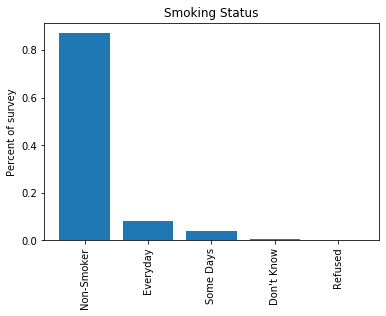

In [35]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], smoking_avg)

# Set title and lables
ax.set_xticklabels(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], rotation=90)
ax.set_ylabel("Percent of survey")
ax.set_title('Smoking Status')

plt.show()

In [36]:
df.groupby(['_STATE', 'smoking'])['smoking'].count()

_STATE  smoking
9.0     1.0         706
        2.0         344
        3.0        8870
        7.0          65
        9.0          26
34.0    1.0         901
        2.0         480
        3.0        9595
        7.0          74
        9.0          14
36.0    1.0        1004
        2.0         512
        3.0        9714
        7.0          28
        9.0          26
Name: smoking, dtype: int64

In [37]:
state_smoking = df.groupby(['_STATE', 'smoking']).agg({'smoking': 'count'})
# Change: groupby state_office and divide by sum
state_pcts = state_smoking.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [38]:
state_pcts

smoking
_STATE smoking           
9.0    1.0       7.052243
       2.0       3.436220
       3.0      88.602537
       7.0       0.649286
       9.0       0.259714
34.0   1.0       8.143529
       2.0       4.338395
       3.0      86.722704
       7.0       0.668836
       9.0       0.126537
36.0   1.0       8.897554
       2.0       4.537398
       3.0      86.086494
       7.0       0.248139
       9.0       0.230415

In [39]:
state_pcts.unstack()

smoking                                         
smoking       1.0       2.0        3.0       7.0       9.0
_STATE                                                    
9.0      7.052243  3.436220  88.602537  0.649286  0.259714
34.0     8.143529  4.338395  86.722704  0.668836  0.126537
36.0     8.897554  4.537398  86.086494  0.248139  0.230415

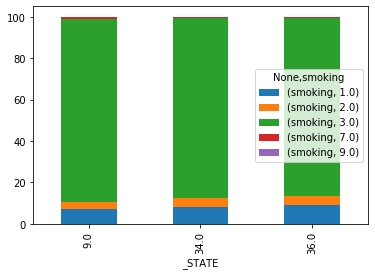

In [40]:
state_pcts.unstack().plot(kind='bar', stacked=True)

In [41]:
#your code here

zero_dict = {3:'non', 
            2: 'some',
            1: 'every',
            7: 'unknown',
            9: 'unknown'}

df['smoking_cat'] = df['smoking'].replace(zero_dict)

In [42]:
df['smoking_cat']

49938         non
49939         non
49940         non
49941         non
49942         non
           ...   
303774      every
303775        non
303776        non
303777    unknown
303778        non
Name: smoking_cat, Length: 33747, dtype: object

In [43]:
state_smoking_cat = df.groupby(['_STATE', 'smoking_cat']).agg({'smoking': 'count'})
# Change: groupby state_office and divide by sum
state_pcts_cat = state_smoking_cat.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_pcts_cat.index.set_levels(['Conn', 'NJ', 'NY'], level=0, inplace=True)
state_pcts_cat

smoking
_STATE smoking_cat           
Conn   every         7.052243
       non          88.602537
       some          3.436220
       unknown       0.909000
NJ     every         8.143529
       non          86.722704
       some          4.338395
       unknown       0.795372
NY     every         8.897554
       non          86.086494
       some          4.537398
       unknown       0.478554

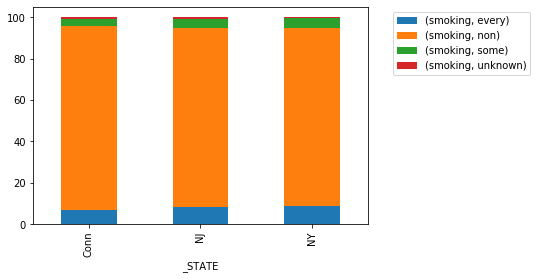

In [44]:
ax = state_pcts_cat.unstack().plot(kind='bar', stacked=True)
ax.legend(bbox_to_anchor=(1.5, 1.0))
plt.show()

In [45]:
cat_avg = df.groupby('smoking_cat')['PHYSHLTH'].mean()
cat_std = df.groupby('smoking_cat')['PHYSHLTH'].std()
cat_avg

smoking_cat
every      6.653007
non        3.764435
some       6.295659
unknown    4.081545
Name: PHYSHLTH, dtype: float64

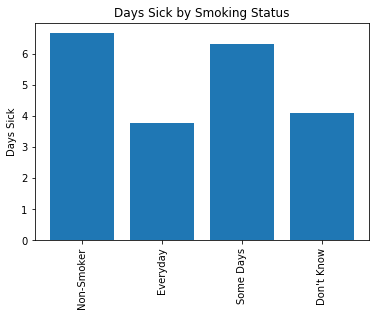

In [46]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Every', 'Non', 'Some',"unkonw"], cat_avg)

# Set title and lables
ax.set_xticklabels(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], rotation=90)
ax.set_ylabel("Days Sick")
ax.set_title('Days Sick by Smoking Status')

plt.show()

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [47]:
alc_dict = {888:0, 
            777: np.nan,
            999: np.nan
            }

df['alcohol'] = df['ALCDAY5'].replace(alc_dict)



In [48]:
df['alcohol']

49938     101.0
49939     230.0
49940       0.0
49941     103.0
49942     101.0
          ...  
303774    203.0
303775      0.0
303776    204.0
303777      NaN
303778    230.0
Name: alcohol, Length: 33747, dtype: float64

In [49]:
# create a function called times100
def calc_monthly(x):
    if x>200:
        return x-200
    elif x>100:
        return min((x-100)*4.34524, 30)
    else:
        return x

In [50]:
df['alcohol']= df['alcohol'].apply(calc_monthly)

In [51]:
df['alcohol'].describe()

count    31532.000000
mean         5.495244
std          8.423029
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: alcohol, dtype: float64

/Users/yingyuxuan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/yingyuxuan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


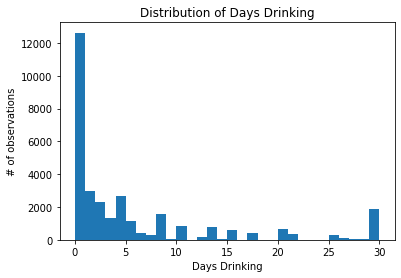

In [52]:
# graphic showing the histogram of data
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df['alcohol'], bins=30)

ax.set_xlabel('Days Drinking')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of Days Drinking")

plt.show()

In [53]:
# code to calculate averages per state
alcohol_state = df.groupby('_STATE')['alcohol'].mean().values
df.groupby('_STATE')['alcohol'].mean()

_STATE
9.0     6.199627
34.0    5.057856
36.0    5.301178
Name: alcohol, dtype: float64

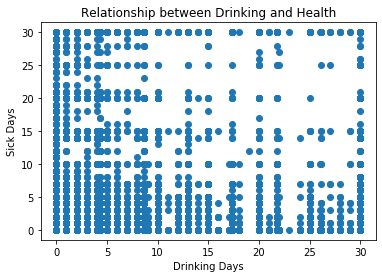

In [54]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(df["alcohol"], df["PHYSHLTH"])

ax.set_xlabel("Drinking Days")
ax.set_ylabel("Sick Days")
ax.set_title('Relationship between Drinking and Health')


plt.show()

In [55]:
df[['PHYSHLTH', 'alcohol']].corr()['PHYSHLTH']

PHYSHLTH    1.000000
alcohol    -0.091154
Name: PHYSHLTH, dtype: float64

# 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

# Education VS Sickday 

## step1: Import the image for data imformation to know our data better 

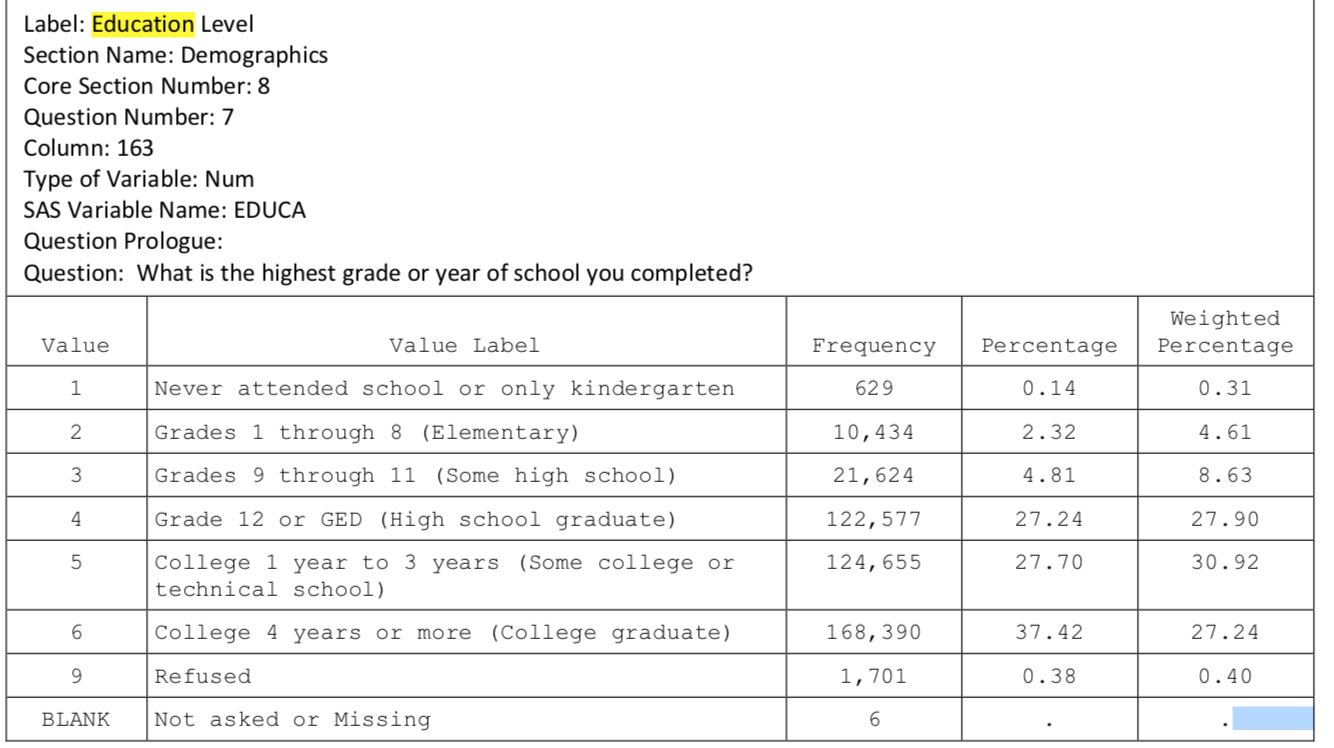

In [56]:
from PIL import Image
myImage = Image.open("education_level.png")
myImage

## step2: Select the data that I want to analyze and clean the data well 

In [57]:
# select the variable we need 
data8_raw1=df[['_STATE','IYEAR','PHYSHLTH','INCOME2','MEDCOST','EDUCA','_AGE_G']]
data8_raw1.head()

,_STATE,IYEAR,PHYSHLTH,INCOME2,MEDCOST,EDUCA,_AGE_G
49938,9.0,2017,0.0,7.0,2.0,6.0,2.0
49939,9.0,2017,0.0,8.0,2.0,5.0,4.0
49940,9.0,2017,2.0,77.0,2.0,6.0,1.0
49941,9.0,2017,0.0,8.0,2.0,6.0,5.0
49942,9.0,2017,0.0,8.0,2.0,5.0,5.0


In [58]:
# collect the data for 2017 
data8_raw=data8_raw1[data8_raw1['IYEAR']==2017]
data8_raw.head()

,_STATE,IYEAR,PHYSHLTH,INCOME2,MEDCOST,EDUCA,_AGE_G
49938,9.0,2017,0.0,7.0,2.0,6.0,2.0
49939,9.0,2017,0.0,8.0,2.0,5.0,4.0
49940,9.0,2017,2.0,77.0,2.0,6.0,1.0
49941,9.0,2017,0.0,8.0,2.0,6.0,5.0
49942,9.0,2017,0.0,8.0,2.0,5.0,5.0


In [59]:
# check the size 
data8_raw.shape

(33703, 7)

In [60]:
# check if there are any missing values
data8_raw.isnull().sum()

_STATE        0
IYEAR         0
PHYSHLTH      0
INCOME2     303
MEDCOST       0
EDUCA         0
_AGE_G        0
dtype: int64

In [61]:
# check updated data 
data8=data8_raw.dropna(axis=0)
data8.head()

,_STATE,IYEAR,PHYSHLTH,INCOME2,MEDCOST,EDUCA,_AGE_G
49938,9.0,2017,0.0,7.0,2.0,6.0,2.0
49939,9.0,2017,0.0,8.0,2.0,5.0,4.0
49940,9.0,2017,2.0,77.0,2.0,6.0,1.0
49941,9.0,2017,0.0,8.0,2.0,6.0,5.0
49942,9.0,2017,0.0,8.0,2.0,5.0,5.0


In [62]:
#Double check if there are any missing data
data8.isnull().sum()

_STATE      0
IYEAR       0
PHYSHLTH    0
INCOME2     0
MEDCOST     0
EDUCA       0
_AGE_G      0
dtype: int64

In [63]:
# number 9 means refuse to anwer so clean data with number 9
data8_clean1=data8[data8['INCOME2']!= 77.0]
data8_clean2=data8_clean1[data8_clean1['INCOME2']!=99]
data8_clean=data8_clean2[data8_clean2['EDUCA']!=9]
data8_clean.head()

,_STATE,IYEAR,PHYSHLTH,INCOME2,MEDCOST,EDUCA,_AGE_G
49938,9.0,2017,0.0,7.0,2.0,6.0,2.0
49939,9.0,2017,0.0,8.0,2.0,5.0,4.0
49941,9.0,2017,0.0,8.0,2.0,6.0,5.0
49942,9.0,2017,0.0,8.0,2.0,5.0,5.0
49943,9.0,2017,0.0,8.0,2.0,6.0,5.0


In [64]:
# check the size of our data 
data8_clean.shape

(27966, 7)

## step 3: Data Visualization (distribution)

### 1.relathionship between education and sickdays

In [65]:
# groupby education level and get the mean of sickdays
ep=pd.DataFrame(data8_clean.groupby('EDUCA')['PHYSHLTH'].mean()).reset_index()
ep

,EDUCA,PHYSHLTH
0,1.0,4.486486
1,2.0,6.310769
2,3.0,7.325325
3,4.0,5.170009
4,5.0,4.771230
5,6.0,2.789679


Text(0.5, 1.0, 'Education level VS Sickdays')

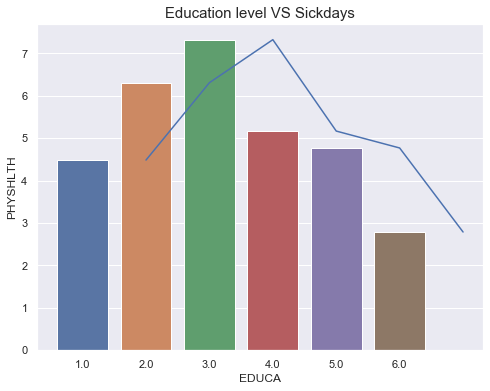

In [311]:
#plot the barchart to see sick days at different levels of education
plt.figure(figsize=(8,6))
sns.barplot(ep['EDUCA'],ep['PHYSHLTH'])
sns.lineplot(ep['EDUCA'],ep['PHYSHLTH'])
plt.title('Education level VS Sickdays',fontsize=15)

### 2. Plot the distribution for each column

In [ ]:
# check each columns' distribution and set up dependent and independent variables
x_edu=np.array(data8_clean['EDUCA']).reshape(-1,1)
y=data8_clean['PHYSHLTH']


plt.figure(figsize=(10,5))
#Distribution of Education Level
ax1=plt.subplot(121)
ax1.hist(x_edu)
ax1.set_title('Distribution of Education Level',fontsize=15)

#Distribution of Sickdays
ax2=plt.subplot(122)
ax2.hist(y,color='g')
ax2.set_title('Distribution of Sickdays',fontsize=15)

plt.show()

# step 4 : Machine learning application

### 1. Import library of sklearn for regression

In [ ]:
# Machine learning appliction 

#import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

# renamelinear Rregression as reg 
reg = LinearRegression()

# regression 
reg.fit(x_edu, y)

### 2. Get the coeffcitent of our independet variable and the model's bias 

In [ ]:
# get coeffiticent
reg.coef_

In [ ]:
# get bias 
reg.intercept_

### The result : The higher education you have the lower probability of sickness you get 
## why?How are health and education related?
##For example, in 2011 the prevalence of diabetes in the United States was 15 percent for adults who did not complete high school. That was twice as high as the rate among college graduates. In the same year, more than one-fourth of adults without a high school diploma were smokers, compared to 8 percent of college graduates. Adults who don't finish high school also can expect to live nine years less than their college-educated peers. And that already sizable gap is widening. 

from https://www.aafp.org/news/blogs/leadervoices/entry/learning_matters_how_education_affects.html

### 3.Obtian predicted dependent values

In [ ]:
# get the predict sickdays' values
y_hat=10-1.167*data8_clean['EDUCA']

# Create a new dataFrame for our original data and prediction data 
pr=pd.DataFrame()
pr['predict_sickdays']=y_hat
pr['education']=data8_clean['EDUCA']
pre=pr.groupby('education')['predict_sickdays'].mean().reset_index()
pre

### 4. Compare predicted values with original values

In [ ]:

plt.figure(figsize=(6,4))
sns.barplot(ep['EDUCA'],ep['PHYSHLTH'],color='g',label='original data')
sns.barplot(pre['education'],pre['predict_sickdays'],color='b',label='predicted data',alpha=0.6)
plt.legend()

# 'Income VS Sickday' 
### Investigate the relationship between income level and health 

In [ ]:
##Income Level   ['INCOME2'] 
##1:$10,000 / 
#2:$15,000 /
#3:  $20,000 /
#4:$25,000/
#5: $35,000 /
#6:$50,000/
#7:$75,000/
#8:75,001/
#77:dont know/
#99:refused

### 1. Data Visualization  

In [ ]:
data8_clean['INCOME2'].value_counts(normalize=True)
data8_bar=pd.DataFrame(data8_clean.groupby('INCOME2')['PHYSHLTH'].mean()).reset_index()
data8_bar.columns=['Income','Physical Sickness Days']
data8_bar

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot('Income','Physical Sickness Days',data=data8_bar)
sns.lineplot('Income','Physical Sickness Days',data=data8_bar)
plt.title('Income  VS  Mean of Physical Sickness Days',fontsize=15)

In [ ]:
#set up dependent and independet variables
x_income=np.array(data8_clean['INCOME2']).reshape(-1,1)
y_sickday=data8_clean['PHYSHLTH']


In [ ]:
# Plot 
plt.figure(figsize=(10,5))
#Distribution of Education Level
ax1=plt.subplot(121)
ax1.hist(x_income)
ax1.set_title('Distribution of Income Level',fontsize=15)

#Distribution of Sickdays
ax2=plt.subplot(122)
ax2.hist(y_sickday,color='g')
ax2.set_title('Distribution of Sickdays',fontsize=15)

plt.show()

### step 3: Machine learning application

In [ ]:
# Machine learning appliction 

#import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

# renamelinear Rregression as reg 
reg = LinearRegression()

# regression 
reg.fit(x_income, y_sickday)

In [ ]:
# get coeffiticent
reg.coef_

In [ ]:
reg.intercept_

# why does income affect health ?
#1) low income may not have good sanitation.
#2) people cannot afford the insurance and cannot get cured fast, so they sick longer.
#3) even though low income people they have benifits from goverment, however other taxpayers incomes are matters
### if taxpayers incomes are low and they pay just a little bit and the goverment could not have enough money 
### to support the poverty better. 

# 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hypotheses below:

1. Smoking increases your chances of feeling sick more days. 

2. Alcohol has no affect on the number of days you feel sick.

3.  People in NJ are less healty than people in Conn.

4.  higher education causes lower sickdays

5. higher income causes lower sickdays

## Statistical Tests 

Below are a number of questions that test the topics covered over the last 3 days. After reading each question, determine the correct satistic or correct statistical stest for each question. After doing your calculations, be sure to still answer the question.  

# 1) What is the average number of sick days per person in this sample?

In [68]:
df['PHYSHLTH'].isnull().sum()

0

In [69]:
#clean the Nan data 
clean_phy=df['PHYSHLTH'].dropna(axis=0)

In [70]:
# double check if our data cleaned
clean_phy.isnull().sum()

0

In [71]:
Average=clean_phy.mean()
Average

4.085340919192817

### 1) Answer:   Average= 4.085340919192817

# 2) What is the standard deviation of the number of sick days in this sample?

In [79]:
import statistics as st
std=st.stdev(clean_phy)
std

8.513292652404095

### 2) standard deviation : 8.513292652404095

# 3) Describe the distribution of sick days (normal or not, skewness, kurtosis).

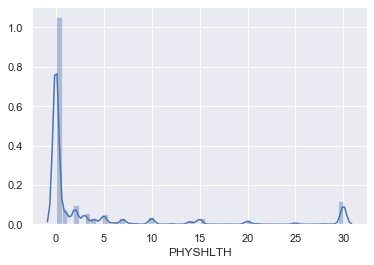

In [408]:
import seaborn as sns
sns.set()
sns.distplot(clean_phy) # Not normal, right skew,

(array([2.867e+04, 8.380e+02, 9.820e+02, 3.400e+01, 4.820e+02, 1.600e+01,
        1.660e+02, 7.000e+00, 7.900e+01, 2.473e+03]),
 array([  0.,  90., 180., 270., 360., 450., 540., 630., 720., 810., 900.]),
 <a list of 10 Patch objects>)

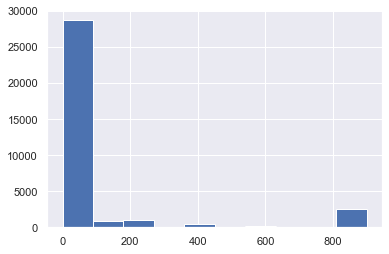

In [406]:
plt.hist((clean_phy)**2)




(array([2.6014e+04, 1.9010e+03, 7.5500e+02, 8.2800e+02, 3.3600e+02,
        6.9000e+02, 4.8200e+02, 1.6000e+01, 1.7300e+02, 2.5520e+03]),
 array([-0.479885  , -0.12748969,  0.22490563,  0.57730095,  0.92969626,
         1.28209158,  1.63448689,  1.98688221,  2.33927752,  2.69167284,
         3.04406815]),
 <a list of 10 Patch objects>)

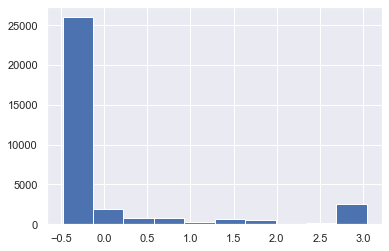

In [399]:
from sklearn.preprocessing import StandardScaler
x=np.array(clean_phy).reshape(-1,1)
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
plt.hist(x_scaled)

# 4) What is the probability of getting this sample mean (average number of sick days), if the population mean is 4?

In [124]:
from scipy.stats import norm

z1=(Average - 4)/(std/np.sqrt(len(clean_phy)))

norm.cdf(z1)

0.9672275828635608

In [315]:
Average

4.085340919192817

### 4) Answer : 96.7%

# 5) Create a 95% confidence interval for the average number of sick days per person.

In [316]:
# we dont know the population variance so we use t-test

from scipy import stats 
import statistics as st

# sample standard deviation
s=std
#sample size
n=len(clean_phy) 
#population mean
pop_mean=4
alpha=1-0.95
degfr=n-1
t=stats.t.ppf(1-alpha/2,df=degfr)
t

1.9600342848681533

In [320]:
# even the data is not normal distributed we still can use Norm.interval()
norm.interval(0.95)

(-1.959963984540054, 1.959963984540054)

In [317]:
#95% confidence interval  alpha =0.05 
[Average-t*s/n**0.5,Average+t*s/n**0.5]

[3.9945079218863824, 4.176173916499252]

# 6) What proportion of the population is considered chronically sick?

In [166]:
#if 1 mean people chronically sick if 0 not sick  the data is not continuous data 
df['CHRONIC'].isnull().sum()

0

In [167]:
len(df['CHRONIC'])

33747

In [168]:
df['CHRONIC'].value_counts()

0    29834
1     3913
Name: CHRONIC, dtype: int64

In [169]:
N=len(df['CHRONIC'])

In [170]:
chr_sick_pro=round(3913/33747,4)
chr_sick_pro   # the sample proportion  we dont know the population proportion 

0.116

## 7) Create a 95% confidence interval for the proportion of chronically sick people.

In [173]:
#standatd deviation of chr
Stdev1=st.stdev(df['CHRONIC'])
Stdev1

0.32017095382121996

In [91]:
# mean 
Mean_pro=df['CHRONIC'].mean()

In [92]:
# get the score 
z2=stats.norm.ppf(1-(1-0.95)/2)
z2

1.959963984540054

In [93]:
#95% confidence interval 
[Mean_pro-z2*Stdev1/len(df['CHRONIC'])**0.5,Mean_pro+z2*Stdev1/len(df['CHRONIC'])**0.5]

[0.11253509018653042, 0.1193670048145067]

# 8)***** What is the probability of drawing this population proportion if chronically sick people is 0.10?

In [324]:
df['CHRONIC'].value_counts()

0    29834
1     3913
Name: CHRONIC, dtype: int64

In [326]:
pro_chro=3913/len(df['CHRONIC'])
pro_chro

0.11595104750051856

In [330]:
sder=np.sqrt((0.1*(1-0.1))/len(df['CHRONIC']))
score=(pro_chro-0.1)/sder
score

9.767547667619164

In [336]:
norm.sf(abs(score))

7.758113951752448e-23

(array([29834.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3913.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

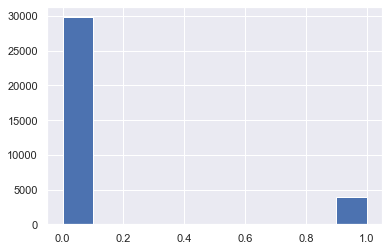

In [391]:

plt.hist(df['CHRONIC'])

# 9) The CDC claims that the average American drinks 4.5 days a month. Joey, a student at UConn, thinks it is much higher. Perform a statistical test to support or reject Joey's claim. 

In [342]:
df['alcohol'].isnull().sum()

2215

In [346]:
alcohol=df[df['_STATE']==9.0]['alcohol'].dropna(axis=0)
alcohol.isnull().sum()

0

In [347]:
# 95% siginificant level alpha=0.05 and twoside tail so alpha/2=0.025 and  1-0.025= 0.975 
Ho=4.5
mean_drink=alcohol.mean()
mean_drink

6.199626564039405

In [348]:
# standard deviation
stv_alco=st.stdev(alcohol)
stv_alco

8.835701850704034

In [349]:
Z3=(mean_drink-Ho)/(stv_alco/len(alcohol)**0.5)
Z3  

18.988081849482786

In [354]:
import scipy.stats as st
p_values = st.norm.sf(abs(Z3))
p_values

1.0700192572232771e-80

In [355]:
if p_values < 0.05:
    print(" At 5% significance level \n Reject the null hypothesis")
    
if p_values < 0.01:
    print(" At 1% significance level \n Reject the null hypothesis")

 At 5% significance level 
 Reject the null hypothesis
 At 1% significance level 
 Reject the null hypothesis


# 10) Do people in NJ have more sick days than people in Connecticut?

In [250]:
pd.DataFrame(df.groupby('_STATE')['PHYSHLTH'].std())

,PHYSHLTH
_STATE,
9.0,8.103732
34.0,8.923776
36.0,8.445330


In [253]:
NJCT

amount
_STATE PHYSHLTH        
9.0    0.0         6779
       30.0         662
       2.0          627
       1.0          496
       5.0          340
...                 ...
36.0   26.0           3
       17.0           2
       22.0           2
       23.0           2
       24.0           2

[92 rows x 1 columns]

In [356]:
NJCT=pd.DataFrame(df.groupby('_STATE')['PHYSHLTH'].value_counts())
NJCT.columns=['amount']
NJCT1=NJCT.reset_index()

nnj=sum((NJCT1[NJCT1['_STATE']==9.0]['amount']))
nct=sum(NJCT1[NJCT1['_STATE']==34.0]['amount'])
nny=sum(NJCT1[NJCT1['_STATE']==36.0]['amount'])


sct=NJCT1[NJCT1['_STATE']==9.0]['PHYSHLTH'].std()
snj=NJCT1[NJCT1['_STATE']==34.0]['PHYSHLTH'].std()
sny=NJCT1[NJCT1['_STATE']==36.0]['PHYSHLTH'].std()

meanct=NJCT1[NJCT1['_STATE']==9.0]['PHYSHLTH'].mean()
meannj=NJCT1[NJCT1['_STATE']==34.0]['PHYSHLTH'].mean()
meanny=NJCT1[NJCT1['_STATE']==36.0]['PHYSHLTH'].mean()

In [357]:
df.groupby('_STATE')['PHYSHLTH'].std()

_STATE
9.0     8.103732
34.0    8.923776
36.0    8.445330
Name: PHYSHLTH, dtype: float64

In [358]:
# hypothesis Ho : NJ - CT  
sp2=((nnj-1)*(snj**2)+(nct-1)*(sct**2))/(nnj+nct-2)
sp2

82.96534547669692

In [359]:
st_error1=np.sqrt(sp2/nnj+sp2/nct)
st_error1

0.12332193774388765

In [360]:
test_score1=(meannj-meanct)/st_error1
abs(test_score1)

2.162361957208904

In [361]:
pnjct = stats.t.sf(abs(test_score1),df=nnj+nct-2)
pnjct

0.0153005470209017

21869

In [222]:

if pnjct < 0.05:
    print(' At significant level of 5% \n we reject the Null hypothesis!')

 At significant level of 5% 
 we reject the Null hypothesis!



# 11) Is there a higher proportion of chronically sick people in NY compared to NJ?

In [235]:
df.groupby('_STATE')['CHRONIC'].value_counts()
# higher propotion of people are sick in NJ  

_STATE  CHRONIC
9.0     0           9336
        1           1077
34.0    0           9999
        1           1459
36.0    0          10499
        1           1377
Name: CHRONIC, dtype: int64

# 12) Do people in Connecticut drink more than people in NY?

In [109]:
df.groupby('_STATE')['alcohol'].mean()
# yes 

_STATE
9.0     6.199627
34.0    5.057856
36.0    5.301178
Name: alcohol, dtype: float64

# 13) Is there a statistically significant difference in the percentage of men and women who are chronically sick?

In [117]:
#check if there are any miss data 
df[['SEX','CHRONIC']].isnull().sum()
sex_data_raw=df[['SEX','CHRONIC']]
sex_data_raw.head()

,SEX,CHRONIC
49938,2.0,0
49939,1.0,0
49940,2.0,0
49941,2.0,0
49942,2.0,0


In [118]:
# the percentage of each gender who have chronical sickness
sex_data=pd.DataFrame(sex_data_raw).reset_index().drop(columns='index')
table1=pd.DataFrame(sex_data.groupby('SEX')['CHRONIC'].value_counts(normalize=True))
table1.columns=['percentage']
table2=table1.reset_index()
table2['SEX']=table2['SEX'].map({2.0:"female",1.0:"male",9.0:'refuse'})
table2

,SEX,CHRONIC,percentage
0,male,0,0.895532
1,male,1,0.104468
2,female,0,0.875099
3,female,1,0.124901
4,refuse,0,0.833333
5,refuse,1,0.166667


<BarContainer object of 6 artists>

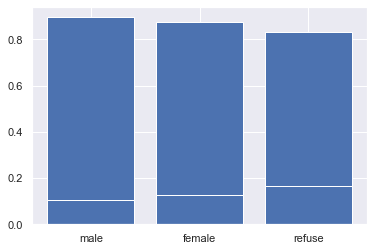

In [119]:
plt.bar(table2['SEX'],table2['percentage'])

In [261]:
sex_data.groupby('SEX')['CHRONIC'].value_counts()

SEX  CHRONIC
1.0  0          13270
     1           1548
2.0  0          16549
     1           2362
9.0  0             15
     1              3
Name: CHRONIC, dtype: int64

In [263]:
sex_data.groupby('SEX')['CHRONIC'].std()

SEX
1.0    0.305876
2.0    0.330615
9.0    0.383482
Name: CHRONIC, dtype: float64

In [363]:
nmale= 1548+13270
nfemale=16549+2362

smale=0.305876
sfemale=0.330615


sp=np.sqrt(((nmale-1)*(smale**2)+(nfemale-1)*(sfemale**2))/(nmale+nfemale-2))

tscore=(0.1044-0.1249-0)/(sp*np.sqrt((1/nmale+1/nfemale)))
abs(tscore) 

5.839534845718054

In [303]:
sex_data.groupby('SEX')['CHRONIC'].mean()

SEX
1.0    0.104468
2.0    0.124901
9.0    0.166667
Name: CHRONIC, dtype: float64

In [362]:
p_value2=stats.t.sf(abs(tscore),df=nmale+nfemale-2)*2
p_value2

5.2825975652726434e-09

In [305]:
if p_value2 < 0.05:
    print(" At 5% significance level \n Reject the null hypothesis")
    
if p_value2 < 0.01:
    print(" At 1% significance level \n Reject the null hypothesis")
    

 At 5% significance level 
 Reject the null hypothesis
 At 1% significance level 
 Reject the null hypothesis


# 14) Men are normally seen as heavier drinkers than women. Is there statistically significant evidence to support this idea?

In [371]:
#  the mean of drink day for men is higher than women 
df.groupby('SEX')['alcohol'].mean()

SEX
1.0    6.839026
2.0    4.453541
9.0    3.965687
Name: alcohol, dtype: float64

In [307]:
sa=pd.DataFrame(df.groupby('SEX')['alcohol'].value_counts())
sa.columns=['Amount']
sa1=sa.reset_index()
sa1['SEX']=sa1['SEX'].map({2.0:"female",1.0:"male",9.0:'refuse'})
sa1

,SEX,alcohol,Amount
0,male,0.00000,4649
1,male,1.00000,1152
2,male,30.00000,1100
3,male,2.00000,988
4,male,4.34524,783
...,...,...,...
74,refuse,1.00000,2
75,refuse,2.00000,1
76,refuse,3.00000,1
77,refuse,4.34524,1


In [384]:
male_mean=df[df['SEX']==1.0]['alcohol'].mean()
male_mean

6.839025841864478

In [387]:
#male
male_mean=df[df['SEX']==1.0]['alcohol'].mean()
nm=len(df[df['SEX']==1.0])
s_male=df[df['SEX']==1.0]['alcohol'].std()

#femal

female_mean=df[df['SEX']==2.0]['alcohol'].mean()
nf=len(df[df['SEX']==2.0])
s_female=df[df['SEX']==2.0]['alcohol'].std()

In [388]:
sp=np.sqrt(((nm-1)*(s_male**2)+(nf-1)*(s_female**2))/(nm+nf-2))
sp

8.34420079547974

In [389]:
t3=(male_mean-female_mean-0)/(sp*np.sqrt(1/nm+1/nf))
t3

26.058069152912534

In [390]:
p5=stats.t.sf(abs(t3),df=nmale+nfemale-2)
p5

1.6045189812324393e-148

In [367]:
if p5 < 0.05:
    print(" At 5% significance level \n Reject the null hypothesis")
    
if p5 < 0.01:
    print(" At 1% significance level \n Reject the null hypothesis")
    

 At 5% significance level 
 Reject the null hypothesis
 At 1% significance level 
 Reject the null hypothesis


15) Find another survey item to investigate and do each of the following:
    
- Create a confidence interval for the population mean or proportion.
- Perform a one sample z or t test on this data.
- Compare two of the states on this survey item.
- Compare the different sexes on this survey item. 